## Finding Errors Manually

This is an exploratory notebook for identifying potential mistakes (as outliers) and tagging them into a CSV.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
starter_df = pd.read_csv('raw_SCT_pay_file.csv')

starter_df.head(3)

,id,cik,ticker,name,position,year,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total,changeInPensionValueAndDeferredEarnings,CEO,CFO,Interim
0,73b3a60ba203743c008330c96b7d8b66,1090872,A,Sam Raha,"Senior Vice President, President Diagnostics a...",2021,563500,0,1541332,0,738536,33534,3262887,NaN,False,False,False
1,97393f60cd9f321650e472673daaa70c,1090872,A,Michael R. McMullen,Chief Executive Officer,2021,1280000,0,9165390,0,3149714,77512,15967631,NaN,True,False,False
2,83b9cc2bca477fe8ce23e0ab56e70c66,1090872,A,Jacob Thaysen,"Senior Vice President, President Life Sciences...",2021,625000,0,1812285,0,897589,13684,3802349,NaN,False,False,False


<AxesSubplot:xlabel='salary', ylabel='Count'>

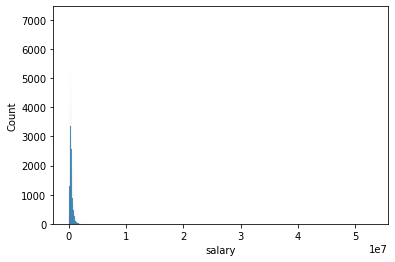

In [14]:
sns.histplot(starter_df[starter_df['salary'] < 100000000]['salary'])

### Visualizations to Find Errors

In [ ]:
plt.figure(figsize=(12,3))
sns.histplot(data=starter_df[starter_df['salary']>1], x='salary');

In [ ]:
plt.figure(figsize=(12,3))
sns.rugplot(x=starter_df['salary']);

In [ ]:
plt.figure(figsize=(12,3))
sns.boxplot(x=starter_df['salary']);

##### This next section of code works in several parts:
1. Identify the DataFrame row index that has the highest salary
2. Slice the DataFrame to display only that row
3. If this is a genuine mistake, add it to the `mistake_df` DataFrame
4. Drop that row from the original DataFrame and reset the index

In [15]:
starter_df[['salary']].astype('float').idxmax()

salary    149457
dtype: int64

In [16]:
#find the index of the highest salary
highest_salary_index = starter_df[['salary']].astype('float').idxmax()

#only run this the first time
#mistakes_df = starter_df.iloc[highest_salary_index].copy()

#look at this highest salary, which is clearly incorrect
starter_df.iloc[highest_salary_index]


,id,cik,ticker,name,position,year,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total,changeInPensionValueAndDeferredEarnings,CEO,CFO,Interim
149457,1e4ef9a59c291947b10235e1cca11435,318300,PEBO,Deborah K. Hill,"Executive Vice President, Consumer and Busines...",2008,18200060667,30000,30135,4436,0,10127,256698,NaN,False,False,False


In [ ]:
mistakes_df = pd.concat([mistakes_df,starter_df.iloc[highest_salary_index]])

In [ ]:
#dropping the highest salary row
starter_df.drop(labels=[highest_salary_index[0]],axis=0,inplace=True)
starter_df.reset_index(inplace=True, drop=True)

In [ ]:
#write the mistakes to a CSV (DO NOT REPLACE ORIGINAL)
#mistakes_df.to_csv('mistakes.csv')#,index = False)

In [ ]:
mistakes_df['ticker'].value_counts()